1) Загрузка данных и создание нового атрибута economic_stress_index

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('modified_synthetic_economic_data.csv', header=0)
df['economic_stress_index'] = df['interest_rate'] * df['unemployment_rate']  # Новый атрибут

# Очистка данных


df = df.drop_duplicates().dropna()
df = df[df['index_price'] >= 0]

# Подготовка данных для кластеризации: используем только процентную ставку и уровень безработицы.
data_points = df[['interest_rate', 'unemployment_rate']].to_numpy()

2) Реализация алгоритма K-means

In [ ]:
def initialize_centroids(data, k):
    np.random.seed(42)
    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices]
    return centroids

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels

def update_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(data, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for iteration in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(data, centroids)
        centroids = update_centroids(data, labels, k)

        shift = np.linalg.norm(centroids - old_centroids)
        if shift < tol:
            print(f"[INFO] Алгоритм K-means завершен на итерации {iteration + 1}")
            break
    return labels, centroids

k = 3
labels, centroids = kmeans(data_points, k)

df['Cluster'] = labels


[INFO] Алгоритм K-means завершен на итерации 8


Визуализация данных: графики для выявления зависимостей


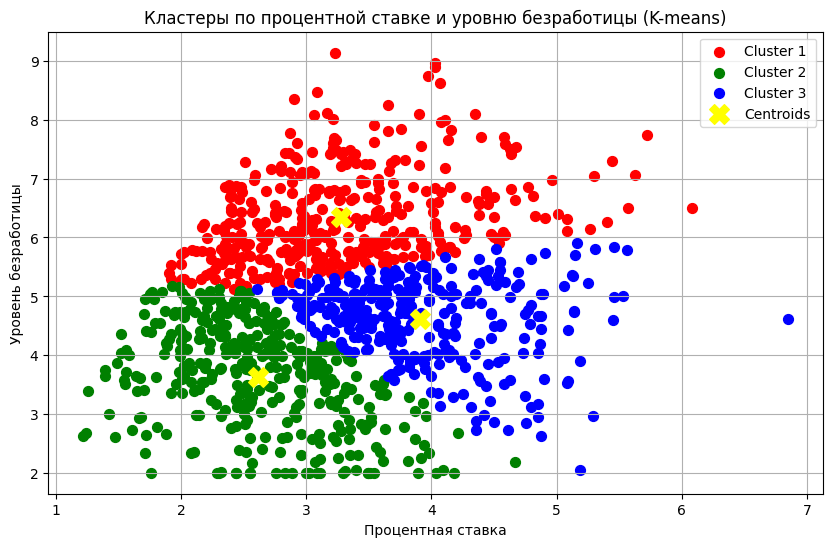

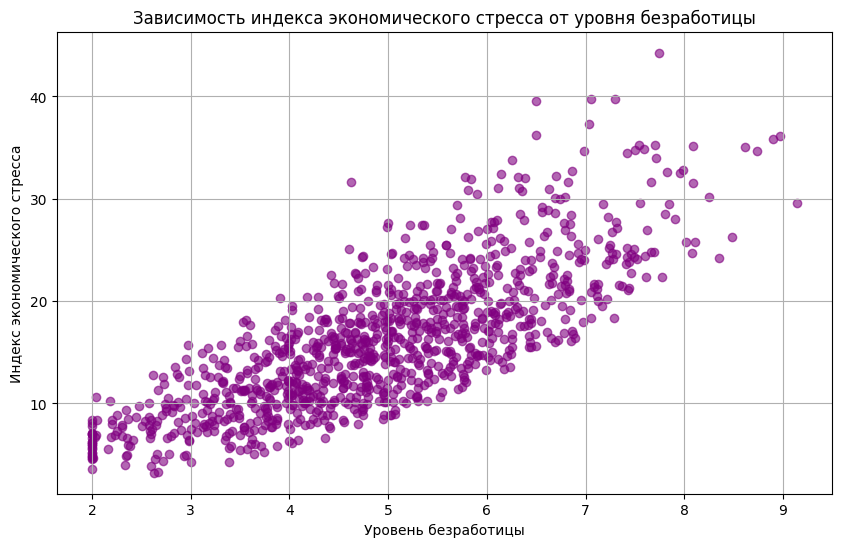

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(k):
    cluster_data = data_points[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, color=colors[i], label=f'Cluster {i + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='X', label='Centroids')
plt.title('Кластеры по процентной ставке и уровню безработицы (K-means)')
plt.xlabel('Процентная ставка')
plt.ylabel('Уровень безработицы')
plt.legend()
plt.grid(True)
plt.show()


# Шаг 5: Визуализация экономического стресса
# ----------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(df['unemployment_rate'], df['economic_stress_index'], alpha=0.6, color='purple')
plt.title('Зависимость индекса экономического стресса от уровня безработицы')
plt.xlabel('Уровень безработицы')
plt.ylabel('Индекс экономического стресса')
plt.grid(True)
plt.show()

**Выводы**:

**На первом графике** визуализировли результаты кластеризации данных с использованием алгоритма K-means. Кластеризация помогла разделить данные на определенные группы на основе их характеристик - процентной ставки и уровня безработицы. Плотное распределение точек данных вокруг центроидов указывает на области схожести данных.

**По второму графику видно**, что индекс безработицы напрямую зависит от уровня безработицы в обществе. Чем выше уровень безработицы, тем выше будет значение индекса безработицы (распределение точек напоминает график функции y = kx + b, где k > 0)